In [1]:
import torch # 파이토치 기본 라이브러리 
import torchvision # 이미지 관련 된 파이토치 라이브러리
from torchvision import datasets # 토치비전에서 제공하는 데이터셋
from torchvision import transforms # 이미지 전처리 기능들을 제공하는 라이브러리
from torch.utils.data import DataLoader # 데이터를 모델에 사용할 수 있도록 적재해 주는 라이브러리
from torch.utils.data import random_split
import numpy as np 
import matplotlib.pyplot as plt

## 1. 파이토치 제공 데이터 사용하기

In [2]:
transform = transforms.Compose([transforms.RandomHorizontalFlip(p=0.5),
                                transforms.ToTensor()
])

In [3]:
trainset = datasets.CIFAR10('CIFAR10_data/', download=True, train=True, transform=transform)
testset = datasets.CIFAR10('CIFAR10_data/', download=True, train=False, transform=transform)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting CIFAR10_data/cifar-10-python.tar.gz to CIFAR10_data/
Files already downloaded and verified


In [4]:
batch_size = 16
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader =  DataLoader(testset, batch_size=batch_size, shuffle=False)

## 2. 같은 클래스 별로 폴더를 정리한 경우

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!cp '/content/drive/MyDrive/CatandDog/small_catanddog.zip' './'

In [7]:
!unzip small_catanddog.zip -d CatandDog/

Archive:  small_catanddog.zip
   creating: CatandDog/test/
   creating: CatandDog/test/Cat/
  inflating: CatandDog/test/Cat/8100.jpg  
  inflating: CatandDog/test/Cat/8101.jpg  
  inflating: CatandDog/test/Cat/8102.jpg  
  inflating: CatandDog/test/Cat/8103.jpg  
  inflating: CatandDog/test/Cat/8104.jpg  
  inflating: CatandDog/test/Cat/8105.jpg  
  inflating: CatandDog/test/Cat/8106.jpg  
  inflating: CatandDog/test/Cat/8107.jpg  
  inflating: CatandDog/test/Cat/8108.jpg  
  inflating: CatandDog/test/Cat/8109.jpg  
  inflating: CatandDog/test/Cat/8110.jpg  
  inflating: CatandDog/test/Cat/8111.jpg  
  inflating: CatandDog/test/Cat/8112.jpg  
  inflating: CatandDog/test/Cat/8113.jpg  
  inflating: CatandDog/test/Cat/8114.jpg  
  inflating: CatandDog/test/Cat/8115.jpg  
  inflating: CatandDog/test/Cat/8116.jpg  
  inflating: CatandDog/test/Cat/8117.jpg  
  inflating: CatandDog/test/Cat/8118.jpg  
  inflating: CatandDog/test/Cat/8119.jpg  
  inflating: CatandDog/test/Cat/8120.jpg  
  inf

In [12]:
data_dir = './CatandDog/'

In [11]:
transform = transforms.Compose([transforms.Resize([256, 256]), transforms.ToTensor()])

In [14]:
trainset = datasets.ImageFolder(root=data_dir + '/train/', transform=transform)
testset = datasets.ImageFolder(root=data_dir + '/test/', transform=transform)

In [15]:
trainset

Dataset ImageFolder
    Number of datapoints: 385
    Root location: ./CatandDog//train/
    StandardTransform
Transform: Compose(
               Resize(size=[256, 256], interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
           )

In [16]:
batch_size=16
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)

In [18]:
train_iter = iter(trainloader)
images, labels = next(train_iter)
images.shape, labels.shape

(torch.Size([16, 3, 256, 256]), torch.Size([16]))

## 3. 나만의 데이터셋 만들기 (Cat and Dog 이용)

In [ ]:
# 파이토치에서 제공하는 Dataset 클래스를 활용해 데이터셋 객체를 만들 수 있음
# Dataset은 추상 클래스이며
# 나만의 데이터셋은 Dataset을 상속받은 다음
# 특수 메서드인 __len__()과 __getitem__()을 재정의(오버라이딩)해야 함

# 예시 (아래 패턴을 기억하기!!)
"""
from torch.utils.data import Dataset

class MyDataset(Dataset):
  def __init__(self):

  def __len__(self):

  def __getitem__(self, index):

"""
# __len__() : 데이터셋의 크기를 반환
# __getitem__() : 인덱스를 전달받아 인덱스에 해당하는 데이터를 

# __len__(), __getitem__()의 호출 방식 (일반적인 메서드와는 다름)
# __len__()는 len(MyDataset) 형태로 호출
# __getitem__()는 MyDataset[index]

In [73]:
from torch.utils.data import Dataset
import glob
import cv2
from PIL import Image  # Image.open(): PIL에서 이미지를 읽는 함수

class CatandDogDataset(Dataset):
  def __init__(self, root, transform):
      self.filepaths = glob.glob(root + '*/*.jpg')
      self.transform = transform

  def __len__(self):
      return len(self.filepaths)

  def __getitem__(self, index):
      image_path = self.filepaths[index]
      # pytorch dataset에서는 image 데이터를 PIL 형태로 읽음
      image = Image.open(image_path)
      image_transformed = self.transform(image)

      # OpenCV를 이용한 방법
      # image = cv2.imread(image_path)
      # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      # resized_image = cv2.resize(256, 256)
      # tensor_image = transforms.ToTensor(resized_image)
      
      # image_path 예시: ./CatandDog//train/Dog/933.jpg
      dir_label = image_path.split('/')[-2]
      if dir_label == 'Dog':
          label = 1
      else:
          label = 0

      return image_transformed, label

In [74]:
# torchvision에서 제공하는 전처리
transform = transforms.Compose([transforms.Resize([256, 256]), transforms.ToTensor()])

In [75]:
trainset = CatandDogDataset(root=data_dir + '/train/', transform=transform)
testset = CatandDogDataset(root=data_dir + '/test/', transform=transform)

In [76]:
len(trainset), len(testset)     # trainset.__len__(), testset.__len__()

(385, 98)

In [84]:
trainset.__len__(), testset.__len__()

(385, 98)

In [78]:
print(type(trainset[0][0]), type(trainset[0][1]))

<class 'torch.Tensor'> <class 'int'>


In [80]:
trainset[0][0].shape

torch.Size([3, 256, 256])

In [ ]:
trainset[0][0]  # trainset.__getitem__(300)[0]

In [ ]:
trainset.__getitem__(300)[0]
trainset.__getitem__(300)[0]

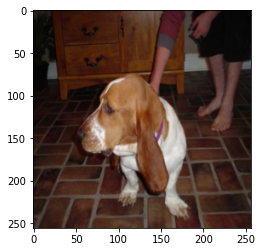

In [82]:
plt.imshow(trainset[0][0].permute(1, 2, 0))

In [87]:
trainset[0][1] # 정답 레이블

1

In [93]:
batch_size = 32
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = DataLoader(trainset, batch_size=batch_size, shuffle=False)

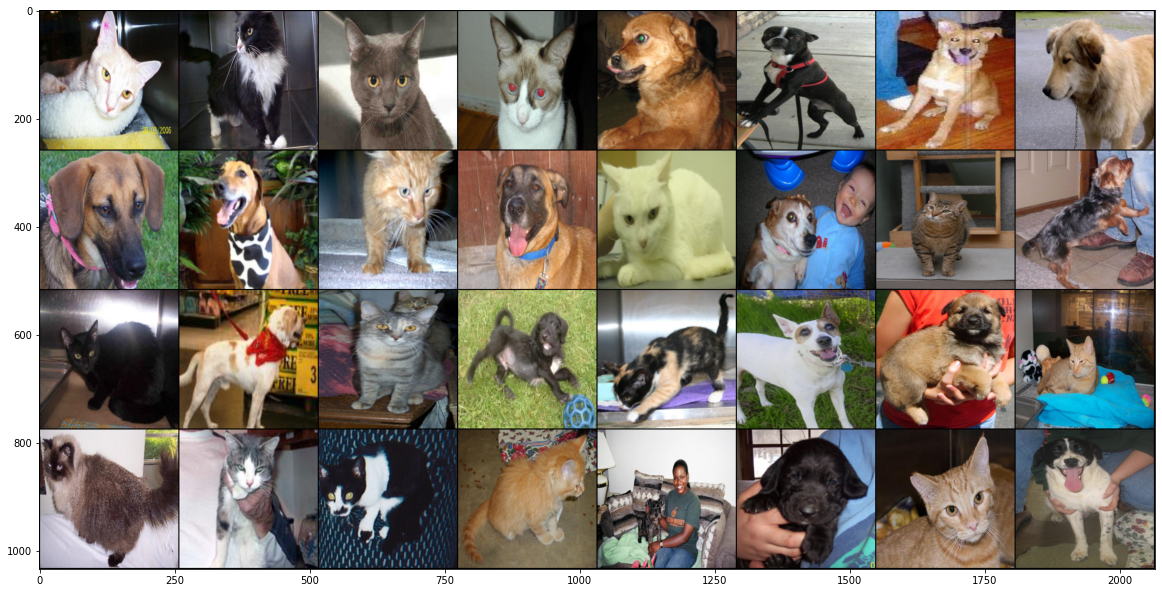

In [94]:
train_iter = iter(trainloader)
images, labels = next(train_iter)
                      
grid_image = torchvision.utils.make_grid(images)
plt.figure(figsize=(20, 200))
plt.imshow(grid_image.permute(1, 2, 0))

### (참고) torchvision.transforms 예시

In [95]:
from google.colab import files
uploaded_img = files.upload()

Saving cactus.png to cactus.png


In [ ]:
# torchvision.transforms
# https://pytorch.org/vision/stable/transforms.html
# Examples

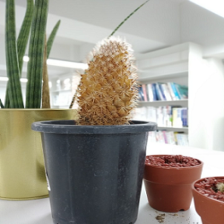

In [96]:
trans = transforms.Resize((224, 224))  # 사이즈를 변경해주는 전처리기(변환기)
image = Image.open('cactus.png')
resized_image = trans(image)  # torchvision의 전처리기(변환기)는 PIL 포맷의 이미지를 기대
resized_image  # type은 PIL 포맷

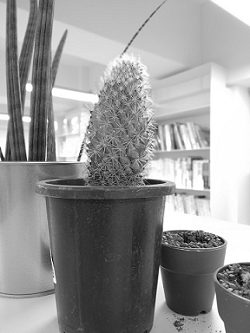

In [104]:
trans = transforms.Grayscale() # Graysccale로 변환해주는 전처리기(변환기)
image = Image.open('cactus.png')
gray_image = trans(image)
gray_image

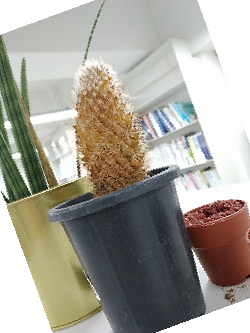

In [106]:
trans = transforms.RandomRotation(degrees=(0, 180))  # random하게 Ratation 해주는 전처리기(변환기)
image = Image.open('cactus.png')
rocated_image = trans(image)
rocated_image

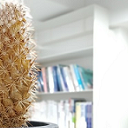

In [107]:
trans = transforms.RandomCrop(size=(128, 128))  # random하게 Crop 시켜주는 전처리기(변환기)
image = Image.open('cactus.png')
cropped_image = trans(image)
cropped_image

## 4. 외부 전처리기 이용하기 (Albumentation 제공)

In [ ]:
# Albumentation 제공 이미지 전처리기의 장점
# torchvison 변환기와 비교했을 때 처리 속도가 빠르고 더 다양한 이미지 변환을 제공
# Object Detection, Segmentation 에서도 사용 가능

In [161]:
from torch.utils.data import Dataset
import glob
import cv2
from PIL import Image  # Image.open(): PIL에서 이미지를 읽는 함수

class CatandDogDataset(Dataset):
  def __init__(self, root, transform):
      self.filepaths = glob.glob(root + '*/*.jpg')
      self.transform = transform

  def __len__(self):
      return len(self.filepaths)

  def __getitem__(self, index):
      image_path = self.filepaths[index]
      # pytorch dataset에서는 image 데이터를 PIL 형태로 읽음
      # image = Image.open(image_path)
      # image_transformed = self.transform(image)

      # albumentation 전처리기에서는 numpy ndarray를 기대
      image = cv2.imread(image_path)
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      transformed_data = self.transform(image=image)


      # image_path 예시: ./CatandDog//train/Dog/933.jpg
      dir_label = image_path.split('/')[-2]
      if dir_label == 'Dog':
          label = 1
      else:
          label = 0

      return transformed_data['image'], label

In [162]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

In [163]:
transform = A.Compose([A.Resize(224, 224), ToTensorV2()])  # 이미지 사이즈 조정 -> 텐서로 변환
# torchvision에서는 tensor로 변환을 하면 정규화까지 같이 해줌
# albumentation에서는 tensor로 변환만 해주고 정규화는 되이 있지 않음

In [164]:
trainset = CatandDogDataset(root=data_dir + '/train/', transform=transform)
testset = CatandDogDataset(root=data_dir + '/test/', transform=transform)

In [165]:
len(trainset)

385

In [167]:
trainset[0][0].shape

torch.Size([3, 224, 224])

### (참고) Albumentation 제공 전처리기 예시

In [ ]:
# Tutorial
# https://albumentations.ai/docs/getting_started/image_augmentation/
# https://albumentations.ai/docs/examples/example/

In [140]:
from google.colab import files
uploaded_img = files.upload()

Saving dog.png to dog.png


(558, 557, 3)


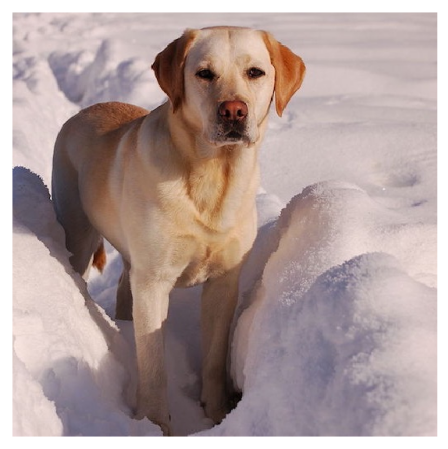

In [141]:
image = cv2.imread('dog.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def show_image(image):
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.axis('off')

show_image(image)
print(image.shape)  # height X width X channels

- 1. Resize : 이미지 크기를 조절하는 변환기 (높이, 너비)

(450, 650, 3)


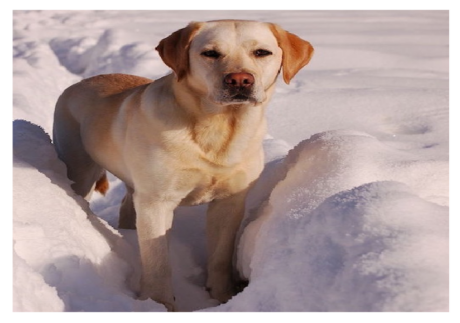

In [142]:
augmentor = A.Resize(450, 650)
aug_img = augmentor(image=image)['image']   # Albumentation에서는 image뿐만 아니라 label도 전처리 가능
                                            # augmentor(image=image, label=label)
show_image(aug_img)
print(aug_img.shape)

- 2. RandomBrightnessContrast : 이미지 밝기와 대비를 조절하는 변환기

(558, 557, 3)


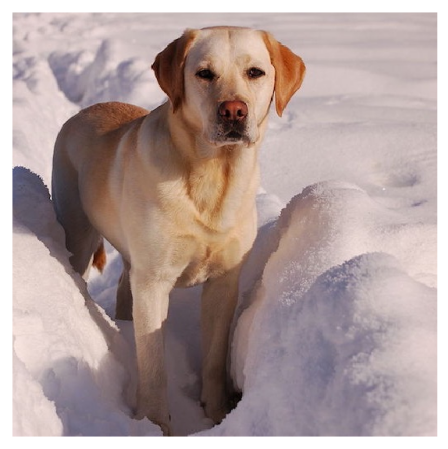

In [144]:
augmentor = A.RandomBrightnessContrast(brightness_limit=0.2,  # -0.2 ~ 0.2 범위에서 임의로 밝기 조절 / -1(검은색), 1(흰색)
                           contrast_limit=0.2,    # brightness_limit와 동작 방식 동일
                           p=0.3)                 # 적용 확률이 0.3이면 30% 확률로 변환기를 적용

aug_img = augmentor(image=image)['image']      
show_image(aug_img)
print(aug_img.shape)

In [147]:
def show_images(images, labels, ncols=4, title=None):
    figure, axes = plt.subplots(figsize=(22, 4), nrows=1, ncols=ncols)
    for i in range(ncols):
        axes[i].imshow(images[i])
        axes[i].set_title(labels[i])

def repeat_aug(count=4, org_image=None, label=None, augmentor=None):
    image_list = [org_image]
    label_list = ['Original']

    for i in range(count):
        aug_image = augmentor(image=org_image)['image']
        image_list.append(aug_image)
        label_list.append(label)
    show_images(image_list, label_list, ncols=count + 1)

In [152]:
augmentor = A.RandomBrightnessContrast(brightness_limit=0.2,  # -0.2 ~ 0.2 범위에서 임의로 밝기 조절 / -1(검은색), 1(흰색)
                           contrast_limit=0.2,    # brightness_limit와 동작 방식 동일
                           p=0.3)                 # 적용 확률을 설정 0.3이면 30% 확률로 변환기를 적용

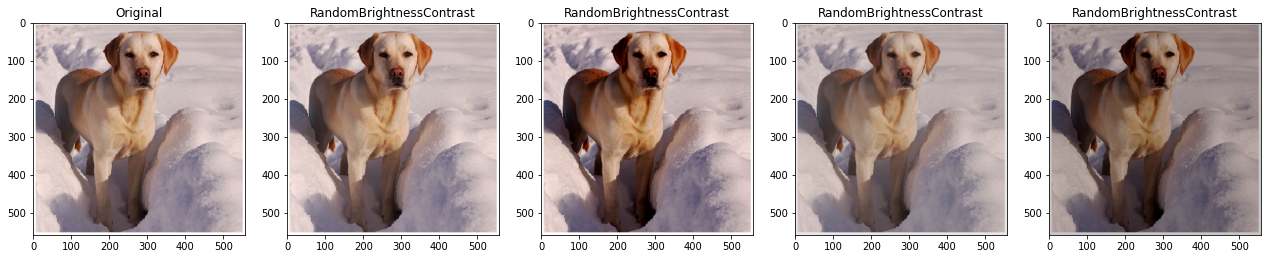

In [153]:
repeat_aug(count=4, org_image=image, label='RandomBrightnessContrast', augmentor=augmentor)

## 5. 나만의 전처리기 만들기